# Corelation Analysis

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
class CorelationAnalysis:
    def __init__(self,sentiment_data,closing_data):
        self.sentiment_data = pd.read_csv(sentiment_data,index_col='date', parse_dates=True)
        self.closing_data = pd.read_csv(closing_data,index_col='Date', parse_dates=True)
    def preprocess_data(self):
        # let's localize the data
        self.sentiment_data.index = self.sentiment_data.index.tz_localize(None)
        self.closing_data.index = self.closing_data.index.tz_localize(None)
        self.merged_data = pd.merge(self.closing_data, self.sentiment_data, left_index=True, right_index=True)
        return self.merged_data
    def check_the_merged_data(self):
        self.mereged_data = self.preprocess_data()
        return self.mereged_data
    def clean_data(self):
        data =self.check_the_merged_data()
        self.cleaned_data = data[['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA', 'nltk_sentiment_label']]
        return self.cleaned_data
    def corelate(self,company):
        # Calculate the correlation matrix
       # Calculate the correlation between sentiment and daily returns for the specific company
        complete_data = self.clean_data()
        complete_data[f'{company} Daily Returns'] = complete_data[company].pct_change()
        
        # Calculate the correlation value
        correlation_returns = complete_data['nltk_sentiment_label'].corr(complete_data[f'{company} Daily Returns'])
        print(f"Correlation between sentiment and daily stock returns of {company}:", correlation_returns)
        
        correlation_closing = complete_data['nltk_sentiment_label'].corr(complete_data[company])
        print(f"Correlation between sentiment and closing price of {company}:", correlation_closing)
        
        # Plot the correlations as a bar plot
        plt.figure(figsize=(8, 6))
        plt.bar(['Daily Returns', 'Closing Price'], [correlation_returns, correlation_closing], color=['blue', 'orange'])
        plt.xlabel('Metrics')
        plt.ylabel('Correlation')
        plt.title(f'Correlation between Sentiment and Stock Metrics for {company}')
        plt.ylim(-1, 1)  # Set y-axis limits to show the correlation range
        for index, value in enumerate([correlation_returns, correlation_closing]):
            plt.text(index, value, f'{value:.3f}', ha='center', va='bottom')
        plt.show()


        # vps ubuntu installed 

In [139]:
sentiment_data = '../data/sentimentanalysis.csv'
closing_data = '../data/closing_for_the_seven_data_together.csv'
# data1 = pd.read_csv('../data/sentimentanalysis.csv',index_col='date', parse_dates=True)
# data2 = pd.read_csv(closing_data, index_col='Date', parse_dates=True)
corelation_analysis = CorelationAnalysis(sentiment_data,closing_data)



In [140]:
corelation_analysis.check_the_merged_data().head()

,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA,Unnamed: 0,headline,url,publisher,stock,headline_length,nltk_sentiment,nltk_sentiment_label,hour,minute
Date,,,,,,,,,,,,,,,,,
2012-12-12,19.25,12.588,17.373878,27.58,27.24,0.313,2.350667,3418,"alcoa, ma'aden begin expansion of aluminum rol...",https://www.benzinga.com/news/12/12/3165837/al...,Charles Gross,AA,85,0.0000,0,0,0
2012-12-12,19.25,12.588,17.373878,27.58,27.24,0.313,2.350667,9962,amerisourcebergen sees 2013 deploying $200m fo...,https://www.benzinga.com/news/12/12/3167764/am...,Paul Quintaro,ABC,91,0.0000,0,0,0
2012-12-12,19.25,12.588,17.373878,27.58,27.24,0.313,2.350667,13056,acadia pharma announces $86m equity financing,https://www.benzinga.com/news/12/12/3166608/ac...,Paul Quintaro,ACAD,45,0.0000,0,0,0
2012-12-12,19.25,12.588,17.373878,27.58,27.24,0.313,2.350667,14077,top 4 large-cap stocks in the property & casua...,https://www.benzinga.com/trading-ideas/12/12/3...,Monica Gerson,ACE,89,-0.3818,-1,0,0
2012-12-12,19.25,12.588,17.373878,27.58,27.24,0.313,2.350667,17023,access midstream partners prices 16m common un...,https://www.benzinga.com/news/earnings/12/12/3...,Charles Gross,ACMP,64,0.0000,0,0,0


In [141]:
corelation_analysis.clean_data()

,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA,nltk_sentiment_label
Date,,,,,,,,
2012-12-12,19.250000,12.588000,17.373878,27.580000,27.240000,0.3130,2.350667,0
2012-12-12,19.250000,12.588000,17.373878,27.580000,27.240000,0.3130,2.350667,0
2012-12-12,19.250000,12.588000,17.373878,27.580000,27.240000,0.3130,2.350667,0
2012-12-12,19.250000,12.588000,17.373878,27.580000,27.240000,0.3130,2.350667,-1
2012-12-12,19.250000,12.588000,17.373878,27.580000,27.240000,0.3130,2.350667,0
...,...,...,...,...,...,...,...,...
2020-06-03,81.279999,123.919998,71.819000,230.160004,185.360001,8.7695,58.863998,-1
2020-06-03,81.279999,123.919998,71.819000,230.160004,185.360001,8.7695,58.863998,-1
2020-06-03,81.279999,123.919998,71.819000,230.160004,185.360001,8.7695,58.863998,1


C:\Users\bekib\AppData\Local\Temp\ipykernel_20976\793172821.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_data[f'{company} Daily Returns'] = complete_data[company].pct_change()


Correlation between sentiment and daily stock returns of AAPL: 0.002254298310584284
Correlation between sentiment and closing price of AAPL: -0.06034604843190691


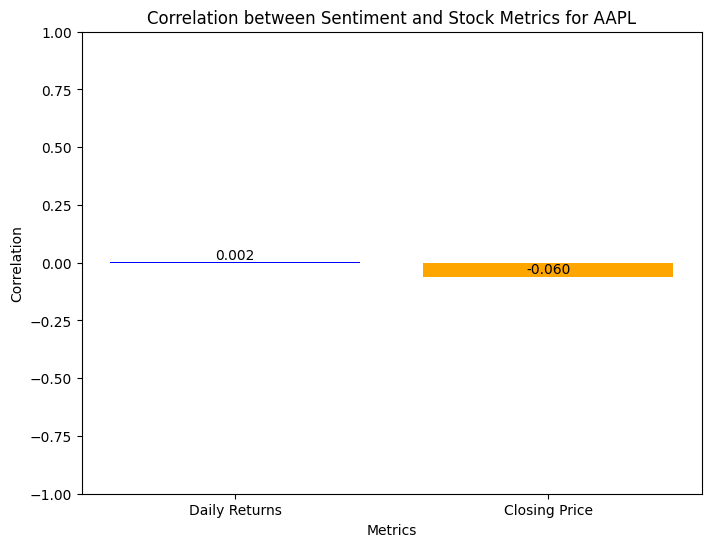

C:\Users\bekib\AppData\Local\Temp\ipykernel_20976\793172821.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_data[f'{company} Daily Returns'] = complete_data[company].pct_change()


Correlation between sentiment and daily stock returns of AMZN: 0.0012451893636827326
Correlation between sentiment and closing price of AMZN: -0.060620504674310495


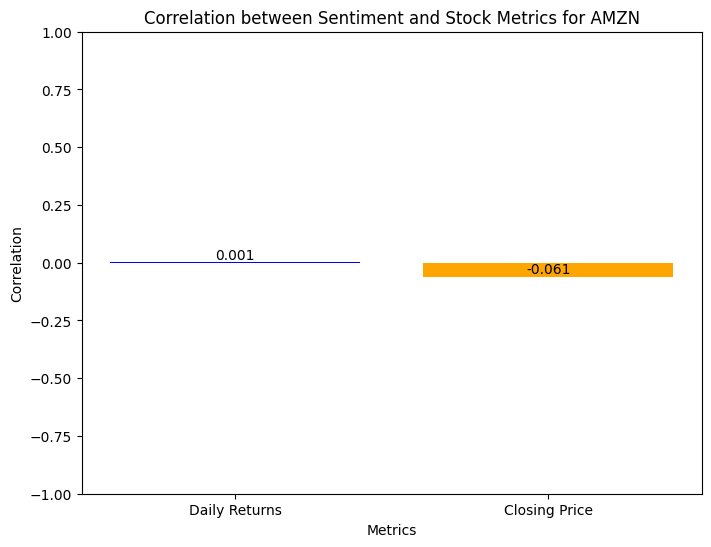

C:\Users\bekib\AppData\Local\Temp\ipykernel_20976\793172821.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_data[f'{company} Daily Returns'] = complete_data[company].pct_change()


Correlation between sentiment and daily stock returns of GOOGL: 0.0021796196256444406
Correlation between sentiment and closing price of GOOGL: -0.0483016679380086


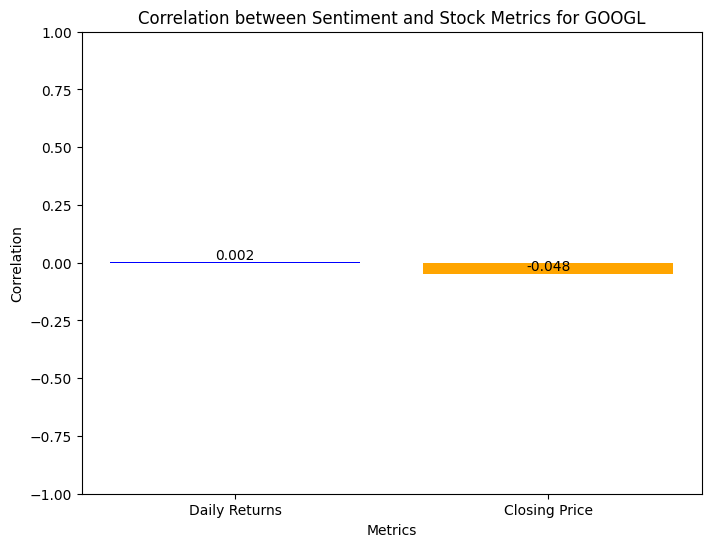

C:\Users\bekib\AppData\Local\Temp\ipykernel_20976\793172821.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_data[f'{company} Daily Returns'] = complete_data[company].pct_change()


Correlation between sentiment and daily stock returns of META: 0.0007126627219438849
Correlation between sentiment and closing price of META: -0.028051664034521764


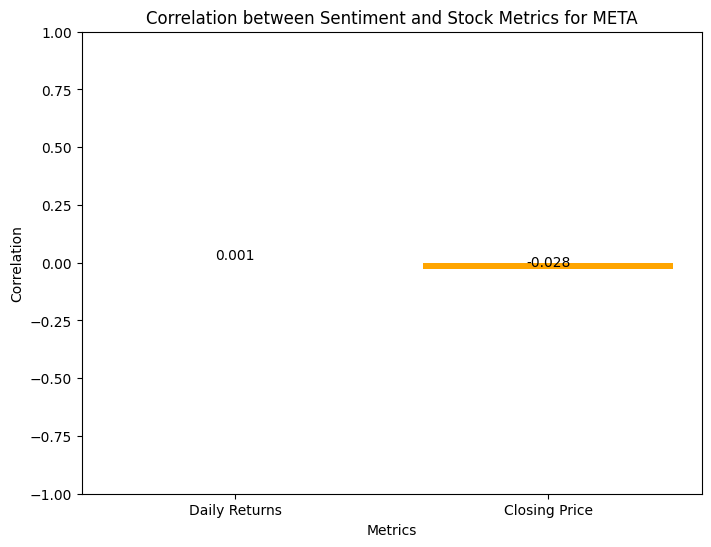

C:\Users\bekib\AppData\Local\Temp\ipykernel_20976\793172821.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_data[f'{company} Daily Returns'] = complete_data[company].pct_change()


Correlation between sentiment and daily stock returns of MSFT: 0.0024934791970083648
Correlation between sentiment and closing price of MSFT: -0.06444323767018914


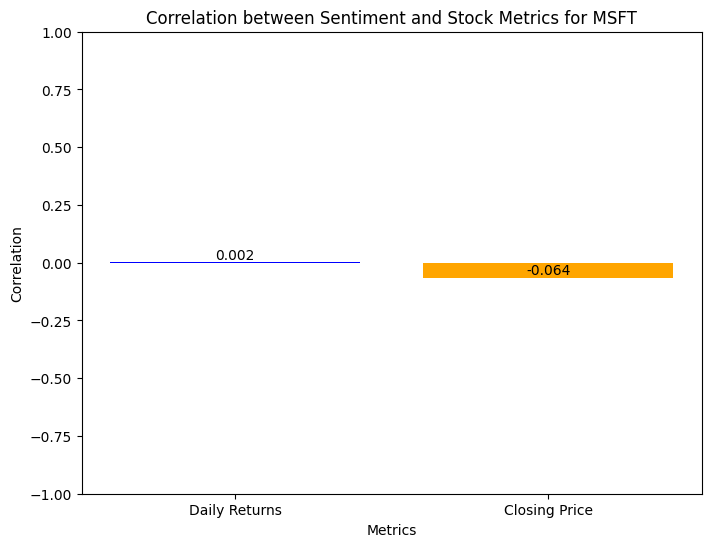

C:\Users\bekib\AppData\Local\Temp\ipykernel_20976\793172821.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_data[f'{company} Daily Returns'] = complete_data[company].pct_change()


Correlation between sentiment and daily stock returns of NVDA: 0.0025119949684167136
Correlation between sentiment and closing price of NVDA: -0.04681789730171795


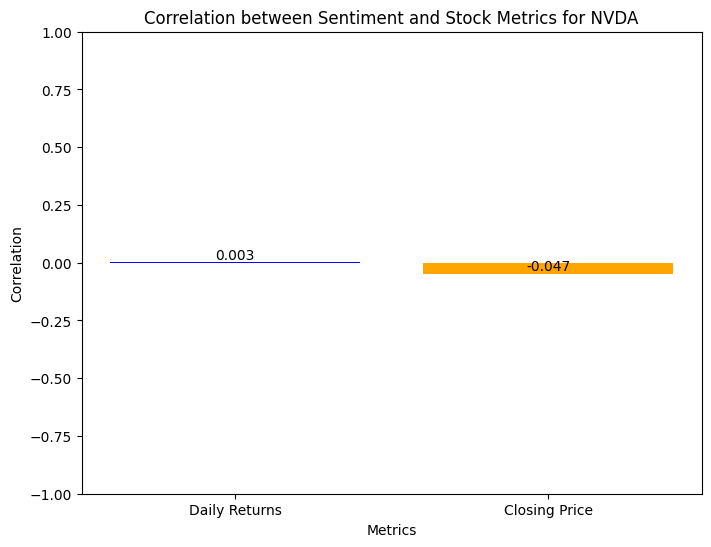

C:\Users\bekib\AppData\Local\Temp\ipykernel_20976\793172821.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_data[f'{company} Daily Returns'] = complete_data[company].pct_change()


Correlation between sentiment and daily stock returns of TSLA: 0.00097872097167723
Correlation between sentiment and closing price of TSLA: -0.042580084138816456


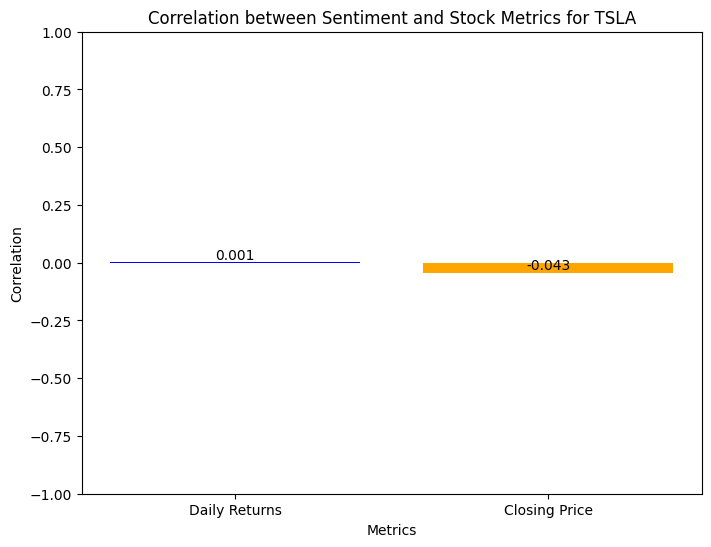

In [142]:
corelation_analysis.corelate('AAPL')
corelation_analysis.corelate('AMZN')
corelation_analysis.corelate('GOOGL')
corelation_analysis.corelate('META')
corelation_analysis.corelate('MSFT')
corelation_analysis.corelate('NVDA')
corelation_analysis.corelate('TSLA')

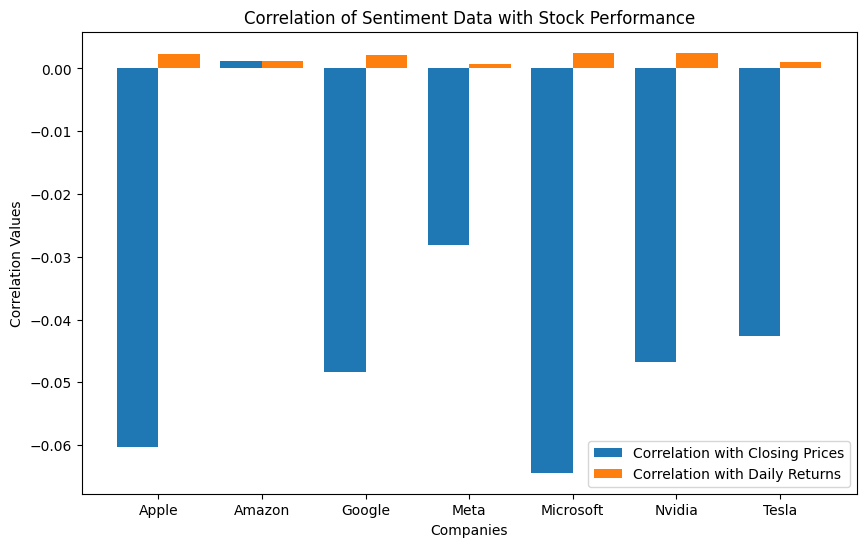

In [143]:

# Data
companies = ['Apple', 'Amazon', 'Google', 'Meta', 'Microsoft', 'Nvidia', 'Tesla']
closing_prices_corr = [-0.0603, 0.0012, -0.0483, -0.0281, -0.0644, -0.0468, -0.0426]
daily_returns_corr = [0.0023, 0.0012, 0.0022, 0.0007, 0.0025, 0.0025, 0.0010]

# Create a grouped bar chart
x = range(len(companies))

plt.figure(figsize=(10, 6))

plt.bar(x, closing_prices_corr, width=0.4, label='Correlation with Closing Prices', align='center')
plt.bar([p + 0.4 for p in x], daily_returns_corr, width=0.4, label='Correlation with Daily Returns', align='center')

# Labels and Title
plt.xlabel('Companies')
plt.ylabel('Correlation Values')
plt.title('Correlation of Sentiment Data with Stock Performance')
plt.xticks([p + 0.2 for p in x], companies)
plt.legend()

# Show the plot
plt.show()
